In [184]:
# import the necessary libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, skew
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import warnings
warnings.filterwarnings(action='ignore')

In [144]:
df = pd.read_csv(r"C:\Users\spoor\Downloads\covid (1).csv")

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949080 entries, 0 to 949079
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      949080 non-null  int64  
 1   STATE         949080 non-null  object 
 2   AGE_YRS       949080 non-null  float64
 3   SEX           949080 non-null  int64  
 4   SYMPTOM_TEXT  949080 non-null  object 
 5   DIED          949080 non-null  int64  
 6   L_THREAT      949080 non-null  int64  
 7   HOSPITAL      949080 non-null  int64  
 8   HOSPDAYS      949080 non-null  float64
 9   DISABLE       949080 non-null  int64  
 10  RECOVD        949080 non-null  int64  
 11  VAX_DATE      949080 non-null  object 
 12  ONSET_DATE    949080 non-null  object 
 13  NUMDAYS       949080 non-null  int64  
 14  OTHER_MEDS    949080 non-null  object 
 15  CUR_ILL       949080 non-null  object 
 16  HISTORY       949080 non-null  object 
 17  BIRTH_DEFECT  949080 non-null  int64  
 18  ALLE

In [146]:
df.describe()

,VAERS_ID,AGE_YRS,SEX,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,RECOVD,NUMDAYS,BIRTH_DEFECT,SERIOUS
count,9.490800e+05,949080.000000,949080.000000,949080.000000,949080.000000,949080.000000,949080.000000,949080.000000,949080.000000,949080.000000,949080.000000,949080.000000
mean,1.599713e+06,50.020517,0.306738,0.022838,0.034307,0.137519,1.392990,0.043642,0.780524,43.497184,0.001166,0.253353
std,5.088046e+05,18.893433,0.468696,0.149387,0.182016,0.344395,251.983105,0.204298,0.785076,591.180894,0.034133,0.434931
min,9.024180e+05,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.167422e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.502956e+06,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.958156e+06,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,1.000000
max,2.793898e+06,90.000000,2.000000,1.000000,1.000000,1.000000,99999.000000,1.000000,2.000000,44224.000000,1.000000,1.000000


In [147]:
# Check if duplicates have been dropped
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    891805
Name: count, dtype: int64

In [148]:
df.head()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,HOSPITAL,HOSPDAYS,DISABLE,...,BIRTH_DEFECT,ALLERGIES,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,SERIOUS
0,902418,NJ,56.0,0,PATIENT EXPERIENCED MILD NUMBNESS TRAVELING FR...,0,0,0,0.0,0,...,0,,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),HYPOAESTHESIA,INJECTION SITE HYPOAESTHESIA,,,,0
1,902440,AZ,35.0,0,C O HEADACHE,0,0,0,0.0,0,...,0,,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),HEADACHE,,,,,0
2,902446,WV,55.0,0,FELT WARM HOT AND FACE AND EARS WERE RED AND F...,0,0,0,0.0,0,...,0,CONTRAST DYE IV CONTRAST SHELLFISH STRAWBERRY,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),ERYTHEMA,FEELING HOT,FLUSHING,,,0
3,902464,LA,42.0,1,WITHIN MINUTES PROGRESSIVE LIGHT HEADEDNESS LE...,0,0,0,0.0,0,...,0,,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),DIZZINESS,ELECTROCARDIOGRAM NORMAL,HYPERHIDROSIS,LABORATORY TEST NORMAL,PRESYNCOPE,0
4,902465,AR,60.0,0,PT FELT WAVE COME OVER BODY STARTING IN HEAD A...,0,0,0,0.0,0,...,0,BIAXIN,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),DYSGEUSIA,ORAL PRURITUS,PARAESTHESIA,PARAESTHESIA ORAL,PAROSMIA,0


In [149]:
df[['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES']].head()

,SYMPTOM_TEXT,OTHER_MEDS,HISTORY,ALLERGIES
0,PATIENT EXPERIENCED MILD NUMBNESS TRAVELING FR...,LATEX,,
1,C O HEADACHE,,,
2,FELT WARM HOT AND FACE AND EARS WERE RED AND F...,NOVASC HYDROCHLOROTHIAZIDE SYNTHROID LISINOPRI...,HYPERTENSION SLEEP APNEA HYPOTHYROIDISM,CONTRAST DYE IV CONTRAST SHELLFISH STRAWBERRY
3,WITHIN MINUTES PROGRESSIVE LIGHT HEADEDNESS LE...,,,
4,PT FELT WAVE COME OVER BODY STARTING IN HEAD A...,LISINOPRIL HCTZ LIPITOR AMYITRYPLINE LEXAPRO V...,HYPERTENSION FIBROMYALGIA,BIAXIN


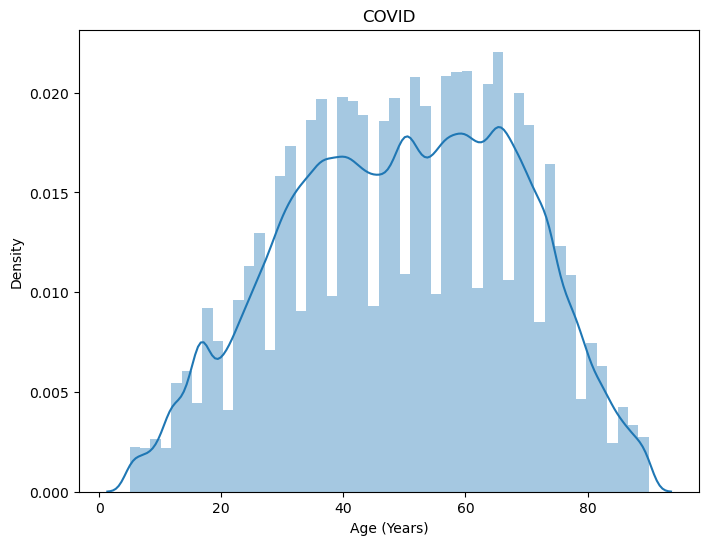

In [150]:
# Distplot
plt.figure(figsize=(8, 6))
sns.distplot(df['AGE_YRS'], kde=True)
plt.title('COVID')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.show()

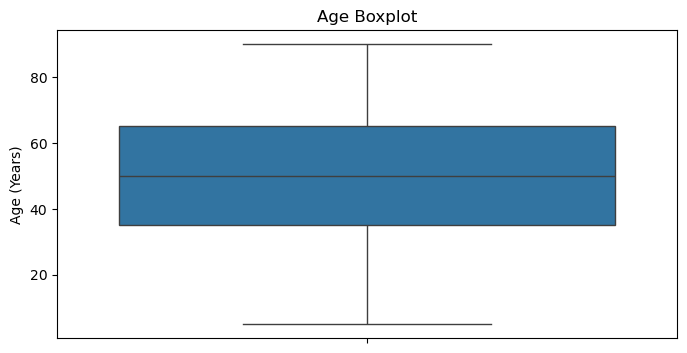

In [151]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['AGE_YRS'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.show()

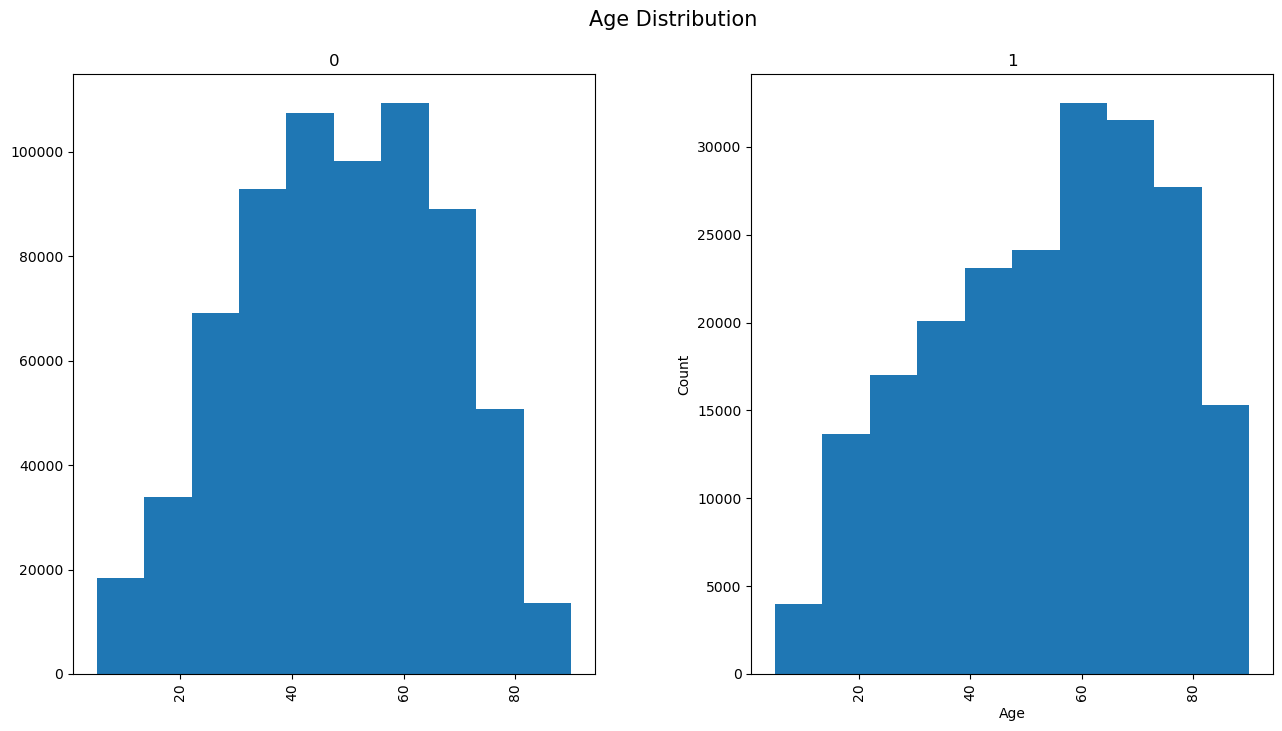

In [152]:
# Distribution of adverse event severity based on age
df['AGE_YRS'].hist(by=df['SERIOUS'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);

In [153]:
plt.figure(figsize=(15,8))
labels = df['VAX_MANU'].value_counts().index
values = df['VAX_MANU'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,marker_colors = [
                      'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)'])])
fig.show()

<Figure size 1500x800 with 0 Axes>

In [154]:
labels = df['VAX_MANU'].value_counts().index
values1 = df[df['SERIOUS'] == 1].VAX_MANU.value_counts().values
values2 = df[df['SERIOUS'] == 0].VAX_MANU.value_counts().values

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= values1, name="Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Non Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seriousness of Vaccine Manufacturer",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Serious', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non Serious', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [155]:
# As unknown manufacturer are negligible 
df = df[~df['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

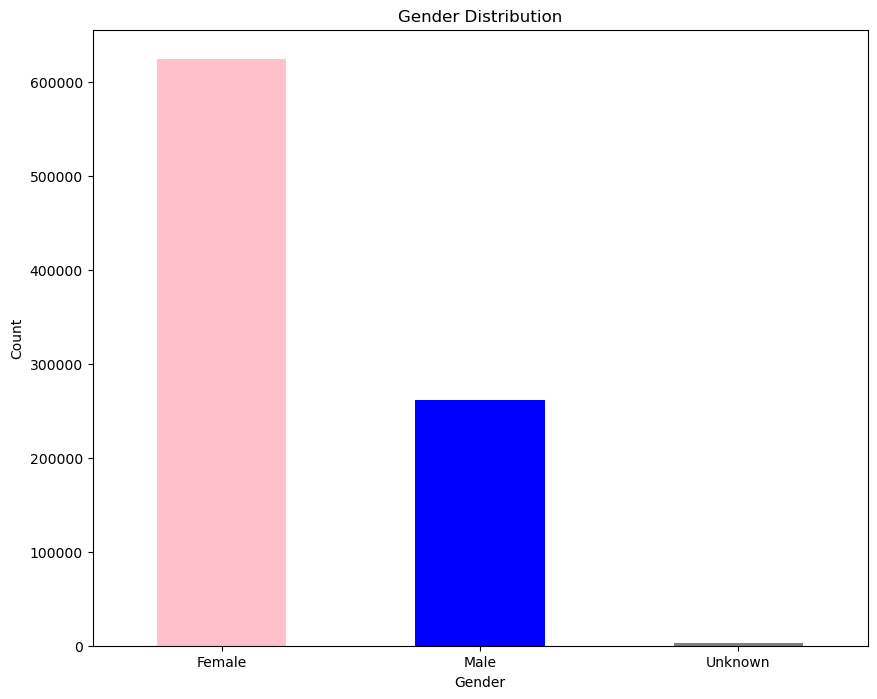

In [156]:
gender_mapping = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df['Gender'] = df['SEX'].map(gender_mapping)

plt.figure(figsize=(10,8))
route = df['Gender'].value_counts()

# Define colors for each gender category
colors = {'Female': 'pink', 'Male': 'blue', 'Unknown': 'gray'}

# Plot the bars with specific colors
route.plot(kind='bar', title='Gender Distribution', color=[colors[gender] for gender in route.index])

plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

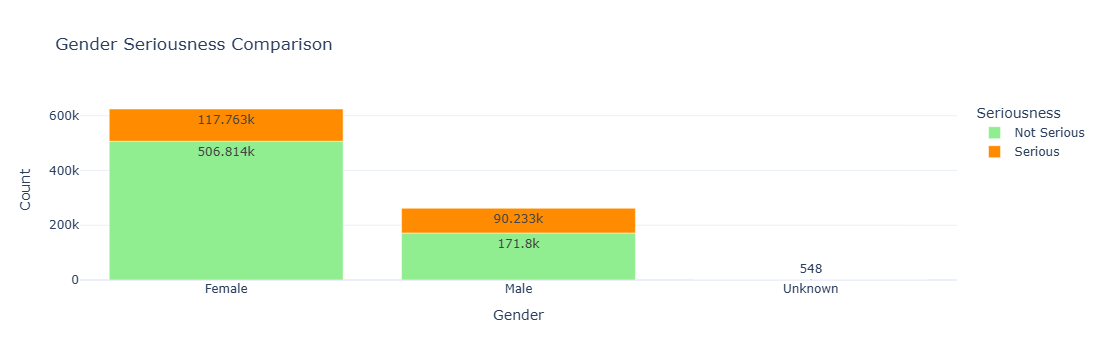

In [157]:
gender_serious = (df.groupby(['SEX', 'SERIOUS']).size()
                  .sort_values(ascending=False)
                  .reset_index(name='count'))

# Define mappings
map_dict = {0: "Female", 1: "Male", 2: "Unknown"}
map_dict_s = {0: "Not Serious", 1: "Serious"}

# Apply mappings
gender_serious["SEX"] = gender_serious["SEX"].map(map_dict)
gender_serious["SERIOUS"] = gender_serious["SERIOUS"].map(map_dict_s)

# New color scheme
new_colors = {'Serious': 'darkorange', 'Not Serious': 'lightgreen'}

# Create the bar plot with new colors
fig = px.bar(gender_serious, x="SEX", y="count", color="SERIOUS", 
             title="Gender Seriousness Comparison",
             text_auto=True,
             color_discrete_map=new_colors)

# Update layout for better visualization
fig.update_layout(
    template="plotly_white",
    xaxis_title="Gender",
    yaxis_title="Count",
    legend_title="Seriousness"
)
fig.show()

In [158]:
# drop all rows with unkown SEX
df = df[df['SEX'] != 2]

In [159]:
age_serious = df[['AGE_YRS', 'SERIOUS']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
age_serious["SERIOUS"] = age_serious["SERIOUS"].map(map_dict_s)

bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(age_serious['AGE_YRS'], bins, labels=group)
age_serious['AGE_CATEGORY'] = categories

In [160]:
age_serious_group = (age_serious.groupby(['AGE_CATEGORY', 'SERIOUS']).size() 
   .reset_index(name='count'))

# Sort the DataFrame by AGE_CATEGORY
age_serious_group['AGE_CATEGORY'] = pd.Categorical(age_serious_group['AGE_CATEGORY'], categories=group, ordered=True)
age_serious_group = age_serious_group.sort_values('AGE_CATEGORY')

# Create the plot
fig = px.bar(age_serious_group, x="AGE_CATEGORY", y="count", color="SERIOUS", 
             text_auto=True,
             color_discrete_sequence=px.colors.qualitative.Vivid,
             title="Age Category and seriousness comparison")
fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age Category"),
    yaxis=dict(title_text="Count")
)
fig.show()

In [161]:
age_serious_sex = df[['AGE_YRS','SEX', 'SERIOUS']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
map_dict = {1: "Male", 0 : "Female"}
age_serious_sex["SERIOUS"] = age_serious_sex["SERIOUS"].map(map_dict_s)
age_serious_sex["SEX"] = age_serious_sex["SEX"].map(map_dict)
bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(age_serious_sex['AGE_YRS'], bins, labels=group)

age_serious_sex['AGE_CATEGORY'] = categories
age_serious_sex1 = (age_serious_sex.groupby(['AGE_CATEGORY','SEX', 'SERIOUS']).size()  
   .reset_index(name='count'))

fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(age_serious_sex1.SERIOUS.unique(), colors):
    plot_df = age_serious_sex1[age_serious_sex1.SERIOUS == r]
    fig.add_trace(
        go.Bar(x=[plot_df.AGE_CATEGORY, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [162]:
subset_df = df[['AGE_YRS','SEX','DIED','VAX_MANU']]
map_dict_d = {1: "Death", 0 : "No Death"}
map_dict = {1: "Male", 0 : "Female"}
subset_df["SEX"] = subset_df["SEX"].map(map_dict)
subset_df["DIED"] = subset_df["DIED"].map(map_dict_d)

bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(subset_df['AGE_YRS'], bins, labels=group)

subset_df['AGE_CATEGORY'] = categories
subset_df

,AGE_YRS,SEX,DIED,VAX_MANU,AGE_CATEGORY
0,56.0,Female,No Death,PFIZER\BIONTECH,51-60
1,35.0,Female,No Death,PFIZER\BIONTECH,31-40
2,55.0,Female,No Death,PFIZER\BIONTECH,51-60
3,42.0,Male,No Death,PFIZER\BIONTECH,41-50
4,60.0,Female,No Death,PFIZER\BIONTECH,51-60
...,...,...,...,...,...
949075,86.0,Female,No Death,PFIZER\BIONTECH,81-90
949076,56.0,Female,No Death,NOVAVAX,51-60
949077,70.0,Male,No Death,PFIZER\BIONTECH,61-70
949078,35.0,Female,No Death,PFIZER\BIONTECH,31-40


In [163]:
subset_df1 = (subset_df.groupby(['AGE_CATEGORY','SEX', 'DIED']).size()  
   .reset_index(name='count'))

In [164]:
fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender Vs Death/No Death",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(subset_df1.DIED.unique(), colors):
    plot_df = subset_df1[subset_df1.DIED == r]
    fig.add_trace(
        go.Bar(x=[plot_df.AGE_CATEGORY, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [165]:
sub = subset_df[(subset_df["DIED"] == 'Death')]
sub = (sub.groupby(['DIED','VAX_MANU']).size()  
   .reset_index(name='count'))

In [166]:
sub

,DIED,VAX_MANU,count
0,Death,JANSSEN,1653
1,Death,MODERNA,7439
2,Death,NOVAVAX,4
3,Death,PFIZER\BIONTECH,8142


In [167]:
sub1 =(df.groupby(['VAX_MANU']).size()  
   .reset_index(name='count'))
sub1 = sub1.rename(columns={"count":"totalcount"})
sub1= sub1.merge(sub, on = 'VAX_MANU')
sub1.drop('DIED',axis=1,inplace=True)
sub1['Percentage'] = sub1['count'].div(sub1['totalcount']).round(4)*100


sub1

,VAX_MANU,totalcount,count,Percentage
0,JANSSEN,67994,1653,2.43
1,MODERNA,410037,7439,1.81
2,NOVAVAX,507,4,0.79
3,PFIZER\BIONTECH,408072,8142,2.00


In [168]:
subset_death = df[(df["DIED"] == 1)]
subset_death = subset_death[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]
subset_death['Symptoms'] = subset_death[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']].apply(lambda x: ','.join(x.dropna()), axis=1)

subset_death

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,Symptoms
4705,909095,FOAMING AT MOUTH,PAIN IN EXTREMITY,PALLOR,PULSE ABSENT,RESPIRATORY ARREST,"FOAMING AT MOUTH,PAIN IN EXTREMITY,PALLOR,PULS..."
4706,909095,SOMNOLENCE,UNRESPONSIVE TO STIMULI,,,,"SOMNOLENCE,UNRESPONSIVE TO STIMULI, , ,"
5953,910363,DEATH,HYPOPHAGIA,HYPOTENSION,SOMNOLENCE,,"DEATH,HYPOPHAGIA,HYPOTENSION,SOMNOLENCE,"
8211,913143,DEATH,,,,,"DEATH, , , ,"
8775,913733,DEATH,,,,,"DEATH, , , ,"
...,...,...,...,...,...,...,...
948778,2792776,ASTHENIA,DEATH,,,,"ASTHENIA,DEATH, , ,"
948912,2793276,BREAKTHROUGH COVID-19,,,,,"BREAKTHROUGH COVID-19, , , ,"
948914,2793279,BREAKTHROUGH COVID-19,,,,,"BREAKTHROUGH COVID-19, , , ,"
948916,2793282,BREAKTHROUGH COVID-19,,,,,"BREAKTHROUGH COVID-19, , , ,"


In [169]:
subset_death = subset_death.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})
df_all_sym = subset_death.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()
df_sym_id = df_all_sym.assign(Symptoms=df_all_sym.Symptoms.str.split(','))
df_sym1 = df_sym_id.explode('Symptoms')

In [170]:
df_sym1

,VAERS_ID,Symptoms
0,909095,FOAMING AT MOUTH
0,909095,PAIN IN EXTREMITY
0,909095,PALLOR
0,909095,PULSE ABSENT
0,909095,RESPIRATORY ARREST
...,...,...
9546,2793370,DEATH
9546,2793370,
9546,2793370,
9546,2793370,


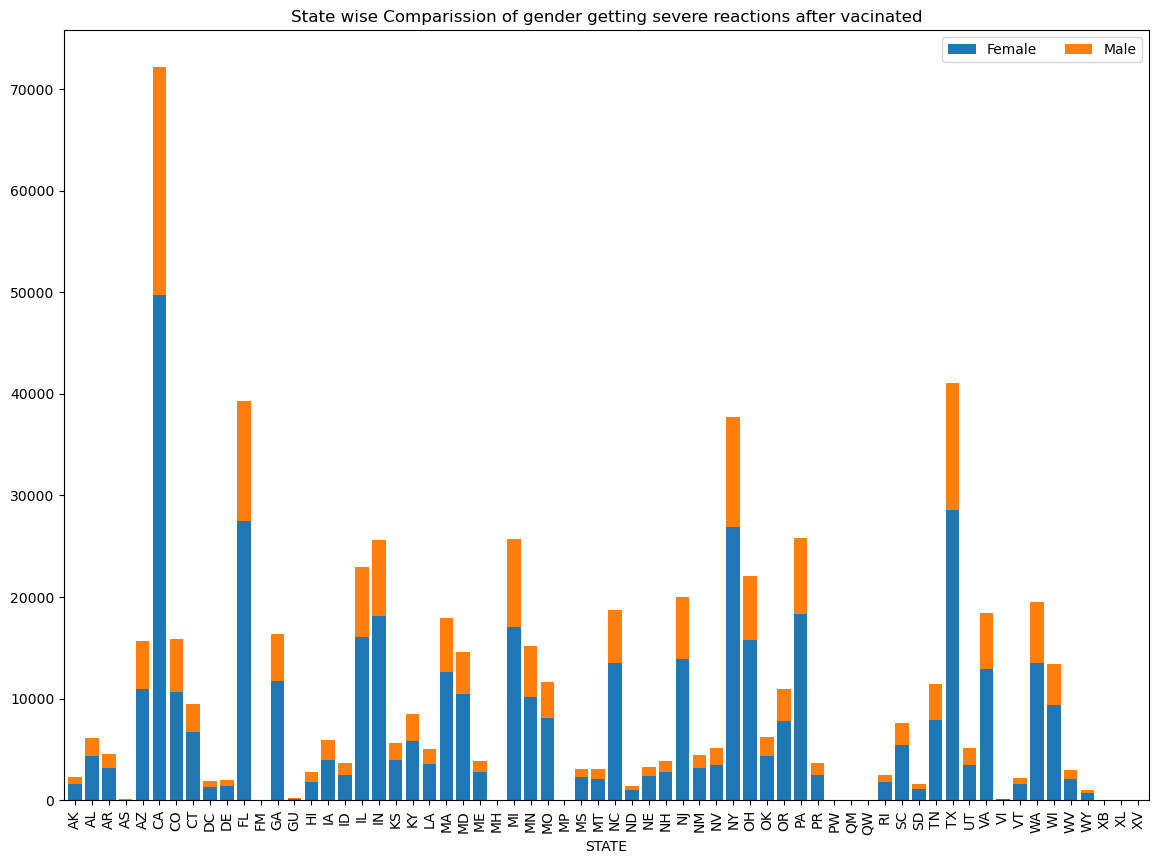

In [171]:
StateAnalysis = df[['VAERS_ID','STATE','VAX_MANU','SEX','AGE_YRS','DIED','RECOVD','SERIOUS']].drop_duplicates()
StateAnalysis = StateAnalysis[StateAnalysis['STATE'] != '']
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SEX).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['Female', 'Male'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of gender getting severe reactions after vacinated', loc ='center')
plt.show()

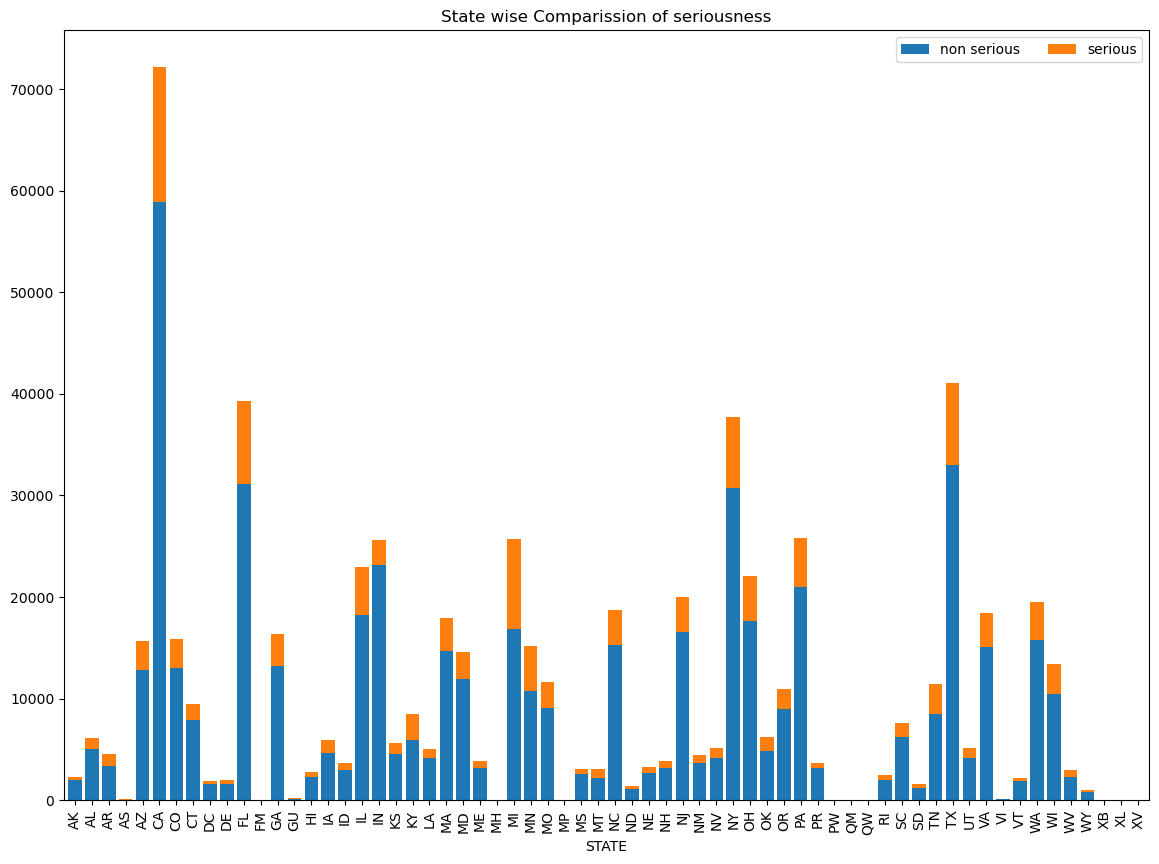

In [172]:
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SERIOUS).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['non serious', 'serious'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of seriousness', loc ='center')
plt.show()

In [173]:
df_allergies = df.filter(['VAERS_ID','ALLERGIES','SERIOUS'], axis=1)
df_allergies.head()

,VAERS_ID,ALLERGIES,SERIOUS
0,902418,,0
1,902440,,0
2,902446,CONTRAST DYE IV CONTRAST SHELLFISH STRAWBERRY,0
3,902464,,0
4,902465,BIAXIN,0


In [174]:
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].astype(str)

# Remove punctuation
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: x.split())
df_allergies.head()

,VAERS_ID,ALLERGIES,SERIOUS
0,902418,[],0
1,902440,[],0
2,902446,"[contrast, dye, iv, contrast, shellfish, straw...",0
3,902464,[],0
4,902465,[biaxin],0


In [175]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
df_allergies.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,VAERS_ID,ALLERGIES,SERIOUS
0,902418,[],0
1,902440,[],0
2,902446,"[contrast, dye, iv, contrast, shellfish, straw...",0
3,902464,[],0
4,902465,[biaxin],0


In [176]:
df_allergies.shape

(886610, 3)

In [177]:
df_allergies = df_allergies.explode('ALLERGIES', ignore_index=True)

df_allergies.head(10)

,VAERS_ID,ALLERGIES,SERIOUS
0,902418,NaN,0
1,902440,NaN,0
2,902446,contrast,0
3,902446,dye,0
4,902446,iv,0
5,902446,contrast,0
6,902446,shellfish,0
7,902446,strawberri,0
8,902464,NaN,0
9,902465,biaxin,0


In [178]:
df_allergies['ALLERGIES'].value_counts(ascending = False)

ALLERGIES
penicillin    62323
sulfa         53932
allergi       47989
known         25545
latex         21927
              ...  
sequin            1
ipamadol          1
cashel            1
ampherin          1
indorol           1
Name: count, Length: 26302, dtype: int64

In [179]:
# Only kepp allergies that are in more than 1000 patients
allergies_count = df_allergies.ALLERGIES.value_counts()
df_allergies = df_allergies[df_allergies.ALLERGIES.isin(allergies_count.index[allergies_count.gt(100)])]
df_allergies['ALLERGIES'].value_counts(ascending = False)

ALLERGIES
penicillin    62323
sulfa         53932
allergi       47989
known         25545
latex         21927
              ...  
paraben         101
intraven        101
capsul          101
tricor          101
complet         101
Name: count, Length: 1328, dtype: int64

In [180]:
df_allergies = df_allergies.drop(df_allergies[df_allergies.ALLERGIES.isin(["nan","past","updat","allerg","codein",
                                                                                                   "none","comment","document","drug",
                                                                                                   "vaccin","nka","nkda","allergi","food",
                                                                                                   "known","unknown","reaction","na","report", 
                                                                                                   "medic","n","see","pcn","ba"])].index)
df_allergies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066769 entries, 2 to 1941063
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   VAERS_ID   1066769 non-null  int64 
 1   ALLERGIES  1066769 non-null  object
 2   SERIOUS    1066769 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 32.6+ MB


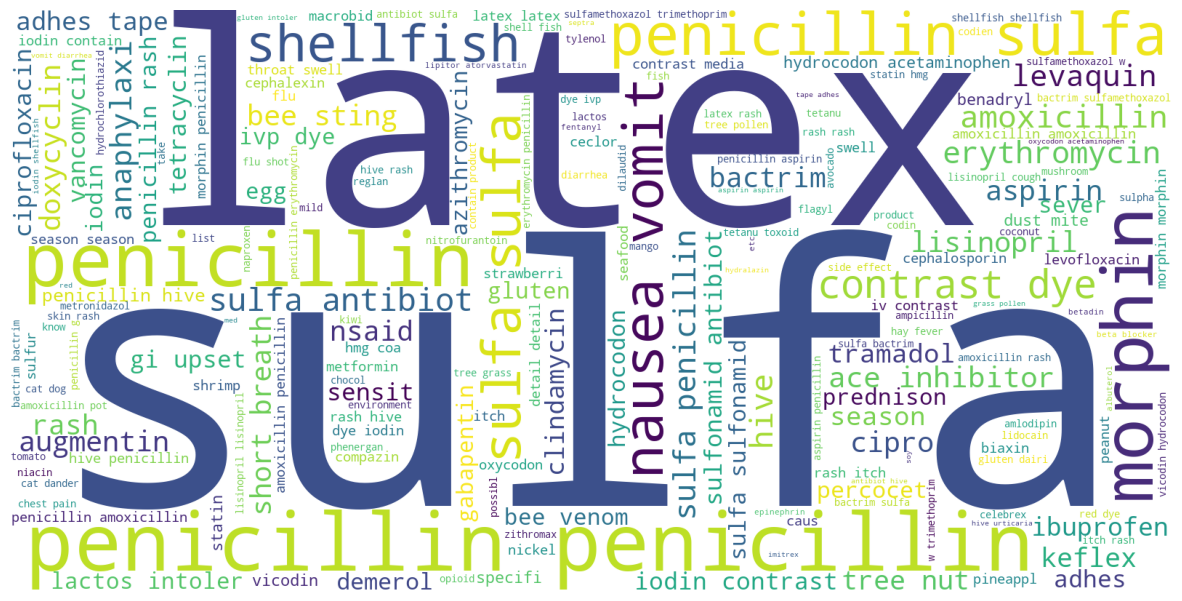

In [192]:
S_ALLERGIES  = df_allergies[df_allergies['SERIOUS']== 1]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()     

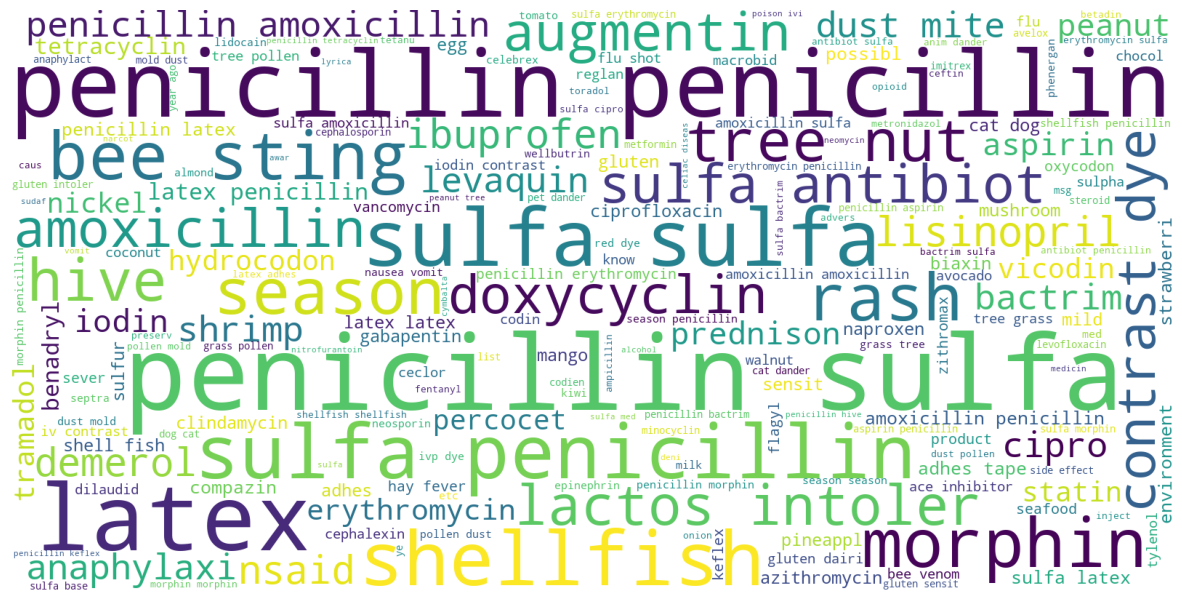

In [193]:
S_ALLERGIES  = df_allergies[df_allergies['SERIOUS']== 0]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()     

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886610 entries, 0 to 949079
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGE_YRS       886610 non-null  float64
 1   SEX           886610 non-null  int64  
 2   SYMPTOM_TEXT  886610 non-null  object 
 3   DIED          886610 non-null  int64  
 4   L_THREAT      886610 non-null  int64  
 5   HOSPITAL      886610 non-null  int64  
 6   HOSPDAYS      886610 non-null  float64
 7   DISABLE       886610 non-null  int64  
 8   RECOVD        886610 non-null  int64  
 9   OTHER_MEDS    886610 non-null  object 
 10  CUR_ILL       886610 non-null  object 
 11  HISTORY       886610 non-null  object 
 12  BIRTH_DEFECT  886610 non-null  int64  
 13  ALLERGIES     886610 non-null  object 
 14  VAX_MANU      886610 non-null  object 
 15  SYMPTOM1      886610 non-null  object 
 16  SYMPTOM2      886610 non-null  object 
 17  SYMPTOM3      886610 non-null  object 
 18  SYMPTOM4 

In [195]:
df.drop(columns=['VAERS_ID','STATE','VAX_DATE','ONSET_DATE','NUMDAYS','VAX_NAME','Gender'],inplace=True)

KeyError: "['VAERS_ID', 'STATE', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'VAX_NAME', 'Gender'] not found in axis"

In [ ]:
df_covid_ML = df

In [ ]:
df_covid_ML.info()

In [ ]:
df_covid_ML.head()

In [ ]:
df_covid_ML.to_csv('C:/Users/chand/Downloads/606/covid_ML.csv', index=False)